# Handwritten Digit Recognition

Detect scanned images of handwritten digits using the *MNIST Database*. 
The database contains `70000` `28x28` images of labelled handwritten digits from NIST.

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Process the Dataset

In [10]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the data (add a channel dimension, meaning that the images are in grayscale)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One-hot encoding of the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### Build and compile the Model

1. `Conv2D`: 32 filters of size 3x3, ReLU activation
2. `MaxPooling2D`: 2x2 max pooling
3. `Conv2D`: 64 filters of size 3x3, ReLU activation
4. `MaxPooling2D`: 2x2 max pooling
5. `Flatten`: Flatten the output of the previous layer
6. `Dense`: 128 units, ReLU activation
7. `Dense`: 10 units (0 - 9), softmax activation, the output layer

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compile the model 
# optimizer: a method to update the weights of the model
# loss: a function that measures how well the model is doing
# metrics: a list of metrics to evaluate the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Training and Validation

In [15]:
# epochs: number of iterations over the dataset
# batch_size: number of samples to use in each iteration
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8870 - loss: 0.3727 - val_accuracy: 0.9824 - val_loss: 0.0569
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9849 - loss: 0.0494 - val_accuracy: 0.9880 - val_loss: 0.0354
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9899 - loss: 0.0310 - val_accuracy: 0.9893 - val_loss: 0.0340
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9928 - loss: 0.0225 - val_accuracy: 0.9883 - val_loss: 0.0365
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9945 - loss: 0.0178 - val_accuracy: 0.9909 - val_loss: 0.0272
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9963 - loss: 0.0121 - val_accuracy: 0.9912 - val_loss: 0.0264
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9971 - loss: 0.0086 - val_accuracy: 0.9914 - val_loss: 0.0253
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9977 - loss: 0.0074 - val_accuracy: 0

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9874 - loss: 0.0445
Test Accuracy: 98.96%


### Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


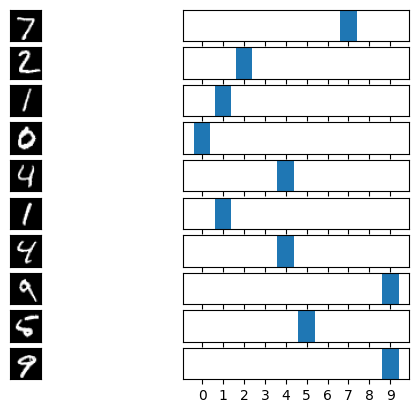

In [26]:
# Predict on a sample
predictions = model.predict(x_test[:10])

# Display the predictions and corresponding ground truths
for i in range(10):
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(10, 2, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10))
    plt.yticks([])
    plt.ylim([0, 1])
plt.show()

### Visalization

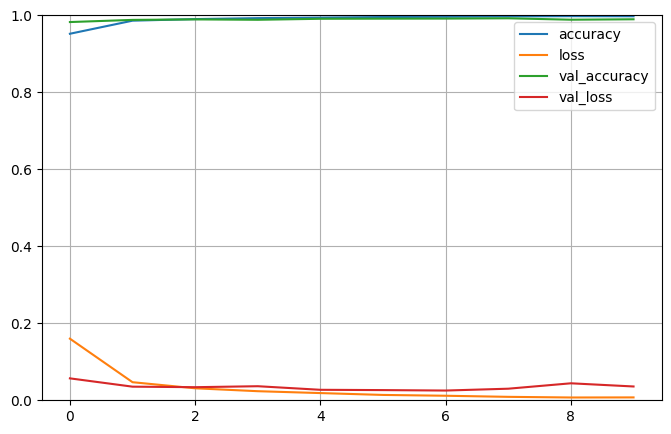

In [29]:
# Plot the learning curves

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # gca: get current axes
plt.show()

Save the model
```python
model.save("model.h5")
```

Load the model
```python
loaded_model = models.load_model("model.h5")
```